## Observations and Insights 

In [68]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [69]:
# Checking the number of mice in the DataFrame.
num_mice = mouse_study_complete['Mouse ID'].nunique()
num_mice

249

In [70]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_df = mouse_study_complete.drop_duplicates(['Mouse ID', 'Timepoint'], keep = 'last')
mouse_study_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [71]:
# Optional: Get all the data for the duplicate mouse ID. 

In [72]:
# Checking the number of mice in the clean DataFrame.
clean_df = mouse_study_df['Mouse ID'].nunique()
clean_df

249

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
tum_vol_avg = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tum_vol_med = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tum_vol_var = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tum_vol_std = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tum_vol_SEM = mouse_study_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


In [74]:
summary_stats_df = pd.DataFrame({"Avg Tumor Volume": tum_vol_avg,
                              "Median Tumor Volume": tum_vol_med,
                              "Var Tumor Volume": tum_vol_var,
                           "SD Tumor Volume": tum_vol_std,
                           "SEM Tumor Volume": tum_vol_SEM})
summary_stats_df

,Avg Tumor Volume,Median Tumor Volume,Var Tumor Volume,SD Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

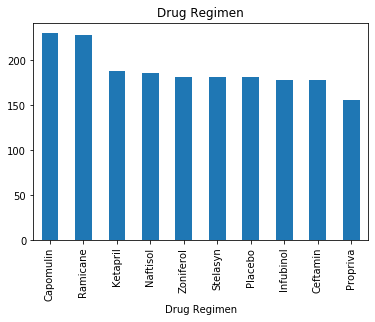

In [75]:
# Generate a bar plot showing the number of mice per time point 
# for each treatment throughout the course of the study using pandas. 

chart_1 = mouse_study_df.groupby(by = 'Drug Regimen').size().sort_values(ascending=False)
chart_1.plot.bar(title='Drug Regimen')

In [76]:
chart_1

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     156
dtype: int64

Text(0, 0.5, 'Number of Data Points')

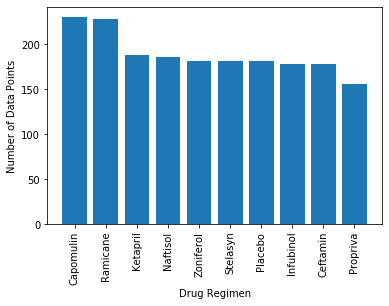

In [77]:
# Generate a bar plot showing the number of mice per time point 
# for each treatment throughout the course of the study using pyplot.
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, \*, align='center', data=None, \*\*kwargs)

plt.bar(chart_1.index, chart_1)
plt.xticks(rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

## Pie Plots

In [78]:
pie_count = mouse_study_df['Sex'].value_counts()

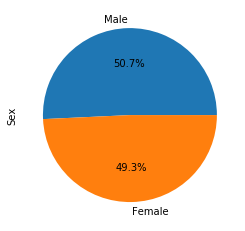

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# do female and male groupby

pie_1 = mouse_study_df['Sex'].value_counts().plot.pie(y='Sex', autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x24b15939c88>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

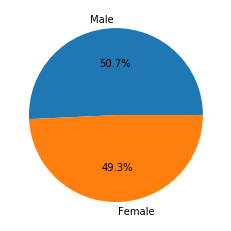

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(pie_count, labels=labels, autopct="%1.1f%%")


## Quartiles, Outliers and Boxplots

In [81]:
#check or get the four most promising treatment regimen from previous bar graphs
summary_stats_df.sort_values('SD Tumor Volume',ascending = True)['SD Tumor Volume'].head(4)

Drug Regimen
Ramicane     4.846308
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Name: SD Tumor Volume, dtype: float64

In [82]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
Ramicane = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Ramicane_quartiles = Ramicane.quantile([.25,.5,.75])
Ramicane_q1 = Ramicane_quartiles[0.25]
Ramicane_q3 = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_q3 - Ramicane_q1
Ramicane_lower_bound = Ramicane_q1 -(1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_q3 +(1.5*Ramicane_iqr)
print(f'values below {ramicane_lower_bound} could be outliers.')
print(f'values above {ramicane_upper_bound} could be outliers.')

values below 24.18658646249998 could be outliers.
values above 57.48804812250001 could be outliers.


In [83]:
Capomulin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Capomulin_quartiles = Capomulin.quantile([.25,.5,.75])
Capomulin_quartiles = Capomulin.quantile([.25,.5,.75])
Capomulin_q1 = Capomulin_quartiles[0.25]
Capomulin_q3 = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_q3 - capomulin_q1
Capomulin_lower_bound = Capomulin_q1 -(1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_q3 +(1.5*Capomulin_iqr)
print(f'values below {capomulin_lower_bound} could be outliers.')
print(f'values above {capomulin_upper_bound} could be outliers.')

values below 26.714832162499995 could be outliers.
values above 55.9711007025 could be outliers.


In [84]:
Infubinol = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Infubinol_quartiles = Infubinol.quantile([.25,.5,.75])
Infubinol_q1 = Infubinol_quartiles[0.25]
Infubinol_q3 = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_q3 - Infubinol_q1
Infubinol_lower_bound = Infubinol_q1 -(1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_q3 +(1.5*Infubinol_iqr)
print(f'values below {Infubinol_lower_bound} could be outliers.')
print(f'values above {Infubinol_upper_bound} could be outliers.')

values below 32.309217298749985 could be outliers.
values above 72.31757996875001 could be outliers.


In [85]:
Ceftamin = mouse_study_df.loc[mouse_study_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
Ceftamin_quartiles = Ceftamin.quantile([.25,.5,.75])
Ceftamin_q1 = Ceftamin_quartiles[0.25]
Ceftamin_q3 = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_q3 - Ceftamin_q1
Ceftamin_lower_bound = Ceftamin_q1 -(1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_q3 +(1.5*Ceftamin_iqr)
print(f'values below {Ceftamin_lower_bound} could be outliers.')
print(f'values above {Ceftamin_upper_bound} could be outliers.')

values below 32.818911426250004 could be outliers.
values above 71.19095325625 could be outliers.


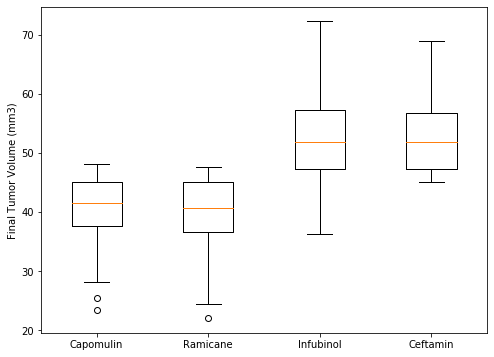

In [86]:

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axl = plt.subplots(figsize=(8,6))
#set y_axis label
axl.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot([capomulin,ramicane,Infubinol,Ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

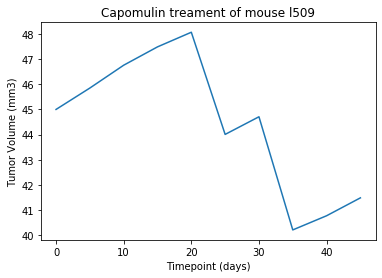

In [87]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_l509 = mouse_study_df.loc[mouse_study_df['Mouse ID'] == 'l509']
#fig, ax1 = plt.subplots(figsize=(8,6))
plt.plot(mouse_l509['Timepoint'], mouse_l509['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.title('Capomulin treament of mouse l509')
plt.show()


In [90]:
Capomulin.head()

10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
Name: Tumor Volume (mm3), dtype: float64

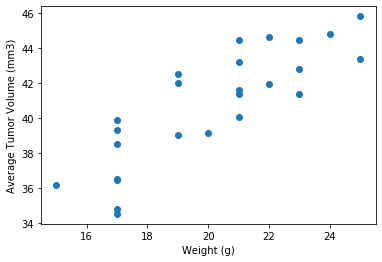

In [98]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin = mouse_study_df[mouse_study_df['Drug Regimen'] == 'Capomulin']
scatter_df = Capomulin.groupby(['Mouse ID']).mean()
plt.scatter(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])

plt.ylabel('Average Tumor Volume (mm3)')
plt.xlabel('Weight (g)')
plt.show()

## Correlation and Regression

0.8419363424694717
LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)


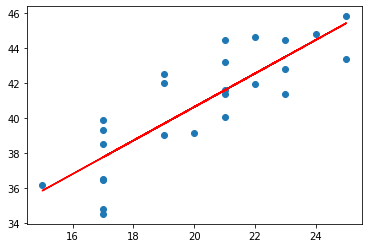

In [100]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])[0]
print(correlation)

line_regression = st.linregress(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])
print(line_regression)

graph_line = scatter_df['Weight (g)']*line_regression[0]+line_regression[1]

plt.scatter(scatter_df['Weight (g)'],scatter_df['Tumor Volume (mm3)'])
plt.plot(scatter_df['Weight (g)'],graph_line,color = 'red')